# Análisezinha e Visualização dos dados do COVID-19

Vídeo que me ajudou: https://www.youtube.com/watch?v=Xk0zHZBa7LM&list=WL&index=11

## Planejamento
        1 - Exploração de dados
        2 - Preparando dados para a visualização
            Examinando os dados temporais
            Agrupando dados
        3 - Gráficos

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
file = 'covid_19_clean_complete.csv'
df = pd.read_csv(file, parse_dates=['Date'])

### 1 - Exploração de dados
        Entender o DataFrame e como os dados estão estruturados,
        para saber como lidar com eles de acordo com nossas necessidades.

In [70]:
df.head() 

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [8]:
# Número de linhas e colunas

df.shape

(19836, 8)

In [10]:
# Colunas
'''
    Já as vimos em .head()
    Mas alguns DataFrames têm tantas colunas que esse método abaixo pode nos
    agregar mais eficiência dependendo da situação.
'''

df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [11]:
# Tipos de dado nas colunas

df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [6]:
# Informações básicas sobre o DataFrame
'''
    Praticamente são os métodos anteriores unidos em um.
'''


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6080 non-null   object        
 1   Country/Region  19836 non-null  object        
 2   Lat             19836 non-null  float64       
 3   Long            19836 non-null  float64       
 4   Date            19836 non-null  datetime64[ns]
 5   Confirmed       19836 non-null  int64         
 6   Deaths          19836 non-null  int64         
 7   Recovered       19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [12]:
# Descrições estatísticas

df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,21.456103,22.498687,880.324662,40.387225,225.932799
std,24.785712,70.688066,8331.133731,492.369584,2645.682524
min,-51.796300,-135.000000,0.000000,0.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.685000,20.902977,1.000000,0.000000,0.000000
75%,41.204400,81.000000,62.000000,0.000000,2.000000
max,71.706900,178.065000,366614.000000,16523.000000,64014.000000


In [16]:
# Valores faltantes, para uma tabela gigante esse não é o melhor uso desse método

df.isnull().head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False


In [19]:
# Diz se há algum valor nulo/faltante em alguma coluna

df.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [20]:
# Nos mostra a quantidade de valores NaN
# Obs: .isnull() e .isna() fazem a mesma operação, 'retornam valores Nulos'

df.isna().sum()

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [23]:
# Nos mostra a quantidade em porcentagem % de valores NaN
''' 69.34% '''
df.isna().sum() / df.shape[0]

Province/State    0.693487
Country/Region    0.000000
Lat               0.000000
Long              0.000000
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.000000
dtype: float64

In [22]:
# Mais atraente? 

(df.isna().sum() / df.shape[0]) *100

Province/State    69.348659
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
dtype: float64

## 2 - Preparando dados para a visualização

In [71]:
# Criando nova coluna representando os casos "atuais" da época (dados são de abril de 2020)
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-06,2,0,0,2
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-06,1,0,0,1
19833,NaN,South Sudan,6.87700,31.307000,2020-04-06,1,0,0,1
19834,NaN,Western Sahara,24.21550,-12.885800,2020-04-06,4,0,0,4
19835,NaN,Sao Tome and Principe,0.18636,6.613081,2020-04-06,4,0,0,4


In [75]:
# Preenchendo missing values 

# df = df.copy() para Evitar Warning

df['Province/State'].fillna('', inplace=True)

#### Examinando os dados temporais
        Por o tipo de dado da coluna Date já ser datetime conseguimos saber
        que temos dados de Janeiro até Abril de 2020. Poderia ocorrer de essa
        coluna ser do tipo object (str, list, dict...), se fosse o caso seria
        bom tranformá-la em datetime por causa das funcionalidades que esse tipo
        de dado nos oferece (como essa em que ele já reconhece para nós a data de
        início e de fim dos dados).

In [76]:
df.Date.describe()

count                   19836
unique                     76
top       2020-01-25 00:00:00
freq                      261
first     2020-01-22 00:00:00
last      2020-04-06 00:00:00
Name: Date, dtype: object

#### Agrupando dados    

In [77]:
# Agrupando por data e região para obter a soma do número de casos confirmados, mortes, recuperados e ativos. 

df_agrupado = df.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

df_agrupado.tail(6)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
13978,2020-04-06,Venezuela,165,7,65,93
13979,2020-04-06,Vietnam,245,0,95,150
13980,2020-04-06,West Bank and Gaza,254,1,24,229
13981,2020-04-06,Western Sahara,4,0,0,4
13982,2020-04-06,Zambia,39,1,5,33
13983,2020-04-06,Zimbabwe,10,1,0,9


In [81]:
# Ordenando o dataframe por casos confirmados, ascending=False -> ordena do maior para o menor

df_agrupado.sort_values(by='Confirmed', ascending=False).head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
13971,2020-04-06,US,366614,10783,19581,336250
13787,2020-04-05,US,337072,9619,17448,310005
13603,2020-04-04,US,308850,8407,14652,285791
13419,2020-04-03,US,275586,7087,9707,258792
13235,2020-04-02,US,243453,5926,9001,228526


In [82]:
# Agrupando novamente por data e região para obter a soma do número de casos confirmados, mortes, recuperados e ativos. 

df_group_paises = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
df_group_paises.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,3031,70,94,2867
1,Albania,4143,200,792,3151
2,Algeria,11826,1028,1048,9750
3,Andorra,5536,140,151,5245
4,Angola,112,18,10,84


In [84]:
# ordena por paises com mais casos confirmados

df_group_paises.sort_values(by='Confirmed', ascending=False).head()

,Country/Region,Confirmed,Deaths,Recovered,Active
36,China,4683417,165756,2847170,1670491
171,US,2831915,64777,98681,2668457
84,Italy,1942859,206052,266247,1470560
156,Spain,1472568,123441,295573,1053554
65,Germany,1142172,12016,217756,912400


In [87]:
# Agrupando a quantidade de casos recuperados, mortes e ativos por data

temp = df.groupby('Date')[['Recovered', 'Deaths', 'Active']].sum().reset_index()
temp.head()

,Date,Recovered,Deaths,Active
0,2020-01-22,28,17,510
1,2020-01-23,30,18,606
2,2020-01-24,36,26,879
3,2020-01-25,39,42,1353
4,2020-01-26,52,56,2010


In [88]:
# Remodelando o DataFrame com variável e valor para ter quantidades de recuperados, mortos e ativos 
# "um empilhado em cima do outro", como você perceberá ao usarmos .head() e .tail()

temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'], var_name='Case', value_name='Count')

    Em outros desenhos ao invés de termos:
    
    Date	Recovered	Deaths	Active
      X         1          1       1
      Y         2          2       2
      Z         3          3       3
      
      
      .melt()
      
      
    Teremos:
    
    Date     Case    Count
     X    Recovered    1
     X      Deaths     1
     X      Active     1
     Y    Recovered    2 
     Y      Deaths     2
     Y      Active     2
     Z    Recovered    3
     Z      Deaths     3
     Z      Active     3 

Essa foto pode ajudar você a entender a aplicação dessa função: https://raw.githubusercontent.com/pauloreis-ds/Paulo-Reis-Ciencia-de-dados/master/4%20-%20Visualiza%C3%A7%C3%A3o%20de%20dados%20-%20Data%20Visualization/Covid-19/melt_exemple.png

In [94]:
temp.head(3)

,Date,Case,Count
0,2020-01-22,Recovered,28
1,2020-01-23,Recovered,30
2,2020-01-24,Recovered,36


In [113]:
temp.tail(3)

,Date,Case,Count
225,2020-04-04,Active,889225
226,2020-04-05,Active,945742
227,2020-04-06,Active,997225


In [114]:
# Definindo Cores
recuperados = '#21bf73'
mortes = '#ff2e63'
ativos = '#fe9801'

### Gráficos

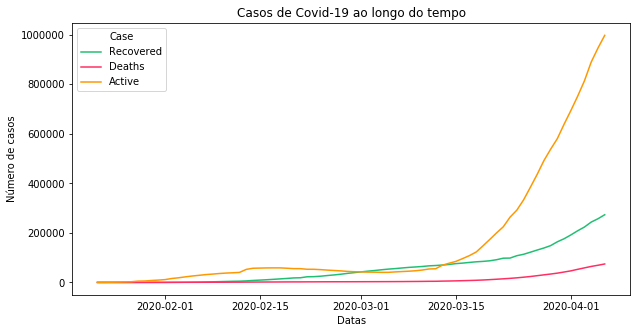

In [178]:
'''
    No eixo X (horizontal) temos as datas
    No eixo Y (vertical) temos a quantidade de casos
    E como "subdivisões" (hue) temos os tipos de casos [Active, Deaths, Recovered].
    Como paleta de cores passamos [recuperados(#21bf73), mortes(#ff2e63), ativos(#fe9801)]
    
'''

plt.figure(figsize=(10,5))

sns.lineplot(x="Date", y="Count", hue='Case', palette=[recuperados, mortes, ativos] ,data=temp )

# Título
plt.title('Casos de Covid-19 ao longo do tempo')

# Nome do eixo x (horizontal)   
plt.xlabel('Datas')

# Nome do eixo y (vertical)
plt.ylabel('Número de casos')

plt.show()

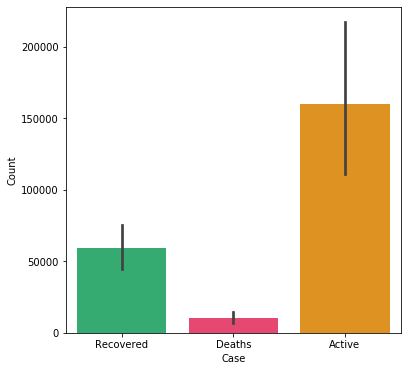

In [215]:
# Basicamente a mesma sintax, mas uma representação diferente (os totais de casos ao fim do período)

plt.figure(figsize=(6,6))

sns.barplot(x='Case', y='Count', palette=[recuperados, mortes, ativos] ,data=temp)

plt.show()

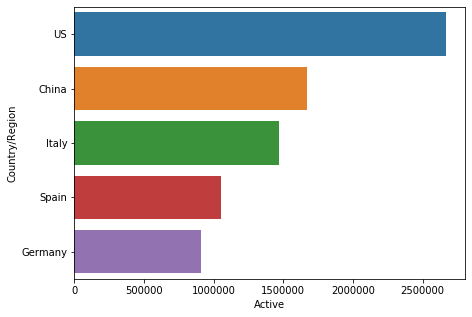

In [277]:
# Países com maior número de casos Ativos

most_active = df_group_paises.sort_values(by='Active', ascending=False).head()

plt.figure(figsize=(7,5))

sns.barplot(x='Active', y="Country/Region",  data=most_active)

plt.show()

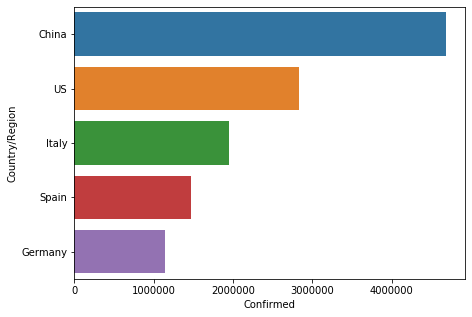

In [276]:
# Países com maior número de casos Confirmados

most_active = df_group_paises.sort_values(by='Confirmed', ascending=False).head()

plt.figure(figsize=(7,5))

sns.barplot(x='Confirmed', y="Country/Region",  data=most_active)

plt.show()

Poderíamos continuar enquanto nossa imaginação e idéias nos permitissem analisar diferentes tipos de variáveis e seus relacionamentos, mas para isso seria bom ter alguns conhecimentos estatísticos sobre gráficos, seus tipos, situações para se utilizar...